In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import turbo_seti.find_event as find

In [2]:
dat_files = [
    "dat_files/GBT_57523_69379_HIP17147_fine.dat", 
    "dat_files/GBT_57606_50058_HIP20901_fine.dat",
    "dat_files/GBT_57456_02669_HIP39826_fine.dat",
    "dat_files/GBT_57803_80733_HIP4436_fine.dat",  
    "dat_files/GBT_57599_55512_HIP45493_fine.dat", 
    "dat_files/GBT_57459_34297_HIP65352_fine.dat", 
    "dat_files/GBT_57650_54573_HIP66704_fine.dat", 
    "dat_files/GBT_57523_22406_HIP74981_fine.dat", 
    "dat_files/GBT_57680_15520_HIP7981_fine.dat",  
    "dat_files/GBT_57664_79761_HIP82860_fine.dat" 
]

# Demo from website

https://www.geeksforgeeks.org/scipy-stats-histogram-function-python/

No. of points in each bin :  [0 2 4 1]
Size of the bins          :  [0 1 2 3 4]


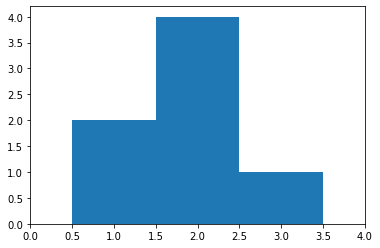

In [4]:
# building the histogram  
import scipy 
import numpy as np  
import matplotlib.pyplot as plt 
  
hist, bin_edges = np.histogram([1, 1, 2, 2, 2, 2, 3], 
                                       bins = range(5)) 
  
# Checking the results 
print ("No. of points in each bin : ", hist) 
print ("Size of the bins          : ", bin_edges) 
  
# plotting the histogram 
plt.bar(bin_edges[:-1], hist, width = 1) 
plt.xlim(min(bin_edges), max(bin_edges)) 
plt.show() 

In [28]:
def calculate_hist(dat_file): # add a parameter for bin width, currently set to 1Mhz
    #read the file into a pandas dataframe
    tbl = find.read_dat(dat_file)

    #make the bins for the histogram
    min_freq = int(min(tbl["Freq"]))
    max_freq = np.round(max(tbl["Freq"]))
    bins = np.arange(min_freq, max_freq, 1)
    hist, bin_edges = np.histogram(tbl["Freq"], bins=bins)
    return hist, bin_edges

In [67]:
hist0, bin_edges0 = calculate_hist(dat_files[0])
hist1, bin_edges1 = calculate_hist(dat_files[1])
hist2, bin_edges2 = calculate_hist(dat_files[2])

In [48]:
np.sum(bin_edges0==bin_edges1)/len(bin_edges0)

1.0

In [68]:
present0 = hist0 > 0
present1 = hist1 > 0
present2 = hist1 > 0

In [69]:
probs = (present0.astype(int) + present1.astype(int) + present2.astype(int))/3

<BarContainer object of 900 artists>

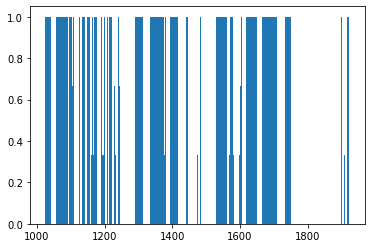

In [70]:
plt.figure()
plt.bar(bin_edges[:-1], probs)#, width = 1) 

One potential issue with just checking if there is a hit in a bin and marking it as true, regardless of how many hits there are, is that there are bins with 1-2 hits and these are regarded the same as bins that have hits in the hundreds. 

It would be interesting to see if there is a way to account for how many hits there are in the bin. 

Or this could be resolved with adding more than 3 files to my dataset. 